## Assignment 3A

### Problem 1 (50 points)
Given below is a differential equation:
$$\dfrac{dx}{dt}=-x^3+\sin(t)$$
with the initial condition $x=0$ at $t=0$.

#### Problem 1.A
Write a program that uses the midpoint method (2nd order Runge–Kutta method) to solve the differential equation.

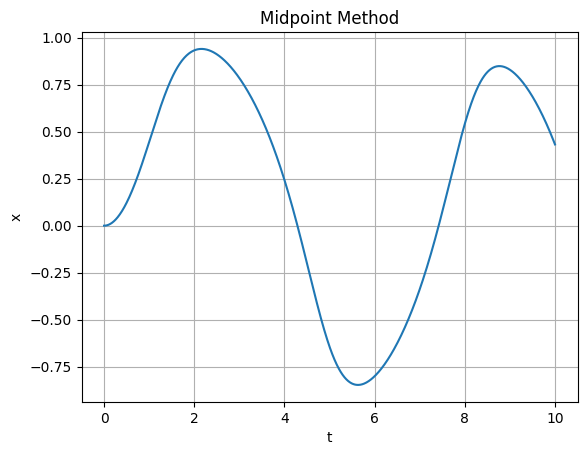

In [3]:
# Imports
import numpy as np

# KR-2 Function
def midpoint_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        x.append(x[-1] + f(t[i] + dt/2, x[-1] + f(t[i], x[-1])*dt/2)*dt)
    return t, x

# Problem Values
f: callable = lambda t, x: -x**3 + np.sin(t)
t0: float = 0
x0: float = 0
dt: float = 0.01
tf: float = 10

# Solve
t, x = midpoint_method_function(f, t0, x0, dt, tf)

# Plot
import matplotlib.pyplot as plt
plt.plot(t, x, label='Midpoint Method ({})'.format(dt))
plt.xlabel('t')
plt.ylabel('x')
plt.title('Midpoint Method')
plt.grid()
plt.show()

#### Problem 1.B
Write a program that uses the 4th order Runge–Kutta method to solve the differential equation.

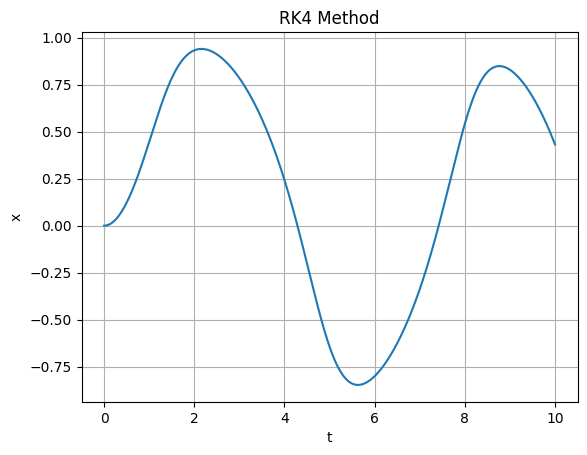

In [4]:
# Imports
import numpy as np

# KR-4 Function
def runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        k1 = f(t[i], x[-1])
        k2 = f(t[i] + dt/2, x[-1] + k1*dt/2)
        k3 = f(t[i] + dt/2, x[-1] + k2*dt/2)
        k4 = f(t[i] + dt, x[-1] + k3*dt)
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return t, x

# Problem Values
f: callable = lambda t, x: -x**3 + np.sin(t)
t0: float = 0
x0: float = 0
dt: float = 0.01
tf: float = 10

# Solve
t, x = runge_kutta_method_function(f, t0, x0, dt, tf)

# Plot
import matplotlib.pyplot as plt
plt.plot(t, x, label='RK4 ({})'.format(dt))
plt.xlabel('t')
plt.ylabel('x')
plt.title('RK4 Method')
plt.grid()
plt.show()

#### Problem 1.C
For both programs, calculate from $t=0$ to $t=10$ using a reasonable number of steps. Plot the results for each of the methods, including the one from the previous assignment for Euler’s method. Do you see improved accuracy with higher-order Runge–Kutta methods? Why?

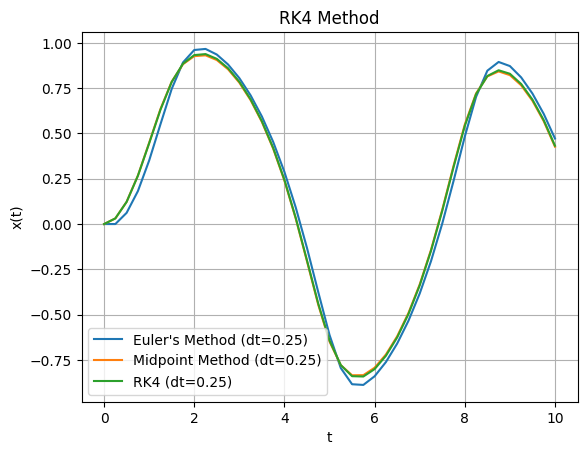

In [5]:
# Imports
import numpy as np

# Euler's Method Function
def eulers_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))
    t = np.arange(t0, tf+dt, dt)
    x = [x0]
    for i in range(len(t)-1):
        x.append(x[-1] + f(t[i], x[-1])*dt)
    return t, x

# Problem Values
f: callable = lambda t, x: -x**3 + np.sin(t)
t0: float = 0
x0: float = 0
dt: float = 0.25
tf: float = 10

# Solve
t1, x1 = eulers_method_function(f, t0, x0, dt, tf)
t2, x2 = midpoint_method_function(f, t0, x0, dt, tf)
t4, x4 = runge_kutta_method_function(f, t0, x0, dt, tf)

# Plot
import matplotlib.pyplot as plt
plt.plot(t1, x1, label=f'Euler\'s Method ({dt=})')
plt.plot(t2, x2, label=f'Midpoint Method ({dt=})')
plt.plot(t4, x4, label=f'RK4 ({dt=})')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('RK4 Method')
plt.grid()
plt.legend()
plt.show()

I do, in fact, see an increased accuracy with the RK4 method over the RK2 and Euler's Method. I had to make the $dt$ relatively large to see the difference, but the RK-4 better approximates a sine-like curve better than the other 2 methods.

This has to do with the subsampling calculation as pseudosteps for RK-4 that allow for higher precision and accuracy since the timestep is split into a fraction that does a better approximation.

### Problem 2 (50 points)
A low-pass filter.
Here is a simple electronic circuit with one resistor and one capacitor.
This circuit acts as a low-pass filter: you send a signal in on the left, and it comes out filtered on the right.

Using Ohm’s law and the capacitor law, and assuming that the output load has very high impedance so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows. Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor. Then:

$$\begin{align}
IR&=V_\text{in}-V_\text{out} & Q&=CV_\text{out} & I&=\dfrac{dQ}{dt}
\end{align}$$
Substituting the second equation into the third, then substituting the result into the first equation, we find that:
$$\dfrac{dV_\text{out}(t)}{dt}+\dfrac{1}{RC}V_\text{out}(t)=\dfrac{1}{RC}V_\text{in}(t)$$
or, equivalently:
$$\boxed{\dfrac{dV_\text{out}(t)}{dt}=\dfrac{1}{RC}\left(V_\text{in}(t)-V_\text{out}(t)\right)}$$
In this assignment you will solve this equation, calculating numerically $V_\text{out}(t)$ for a given $V_\text{in}(t)$.

#### Problem 2.A
Write a program (or modify a previous program) to solve this equation for $V_\text{out}(t)$ using the 4th-order Runge–Kutta method when the input signal is a square-wave with frequency $1$ and amplitude $1$.

Use the program to make plots of the output of the filter circuit from $t = 0$ to $t = 10$ when $RC = 0.01$, $0.1$, and $1$, with the initial condition $V_\text{out}(0)=0$. where $V_\text{in}(t)$ is a square wave defined as:

$$V_\text{in}(t)=\begin{cases}+1,&\lfloor2t\rfloor\in\text{Even}\\-1,&\lfloor2t\rfloor\in\text{Odd}\end{cases}$$

For clarity, see the graph of $V_\text{in}(t)$ in Figure 1.

**Note:** You will have to decide on a suitable value of $dt$ for your calculation. Small values give more accurate results, but the program will take longer to run. Try a variety of different values and choose one for your final calculations that seems sensible to you.

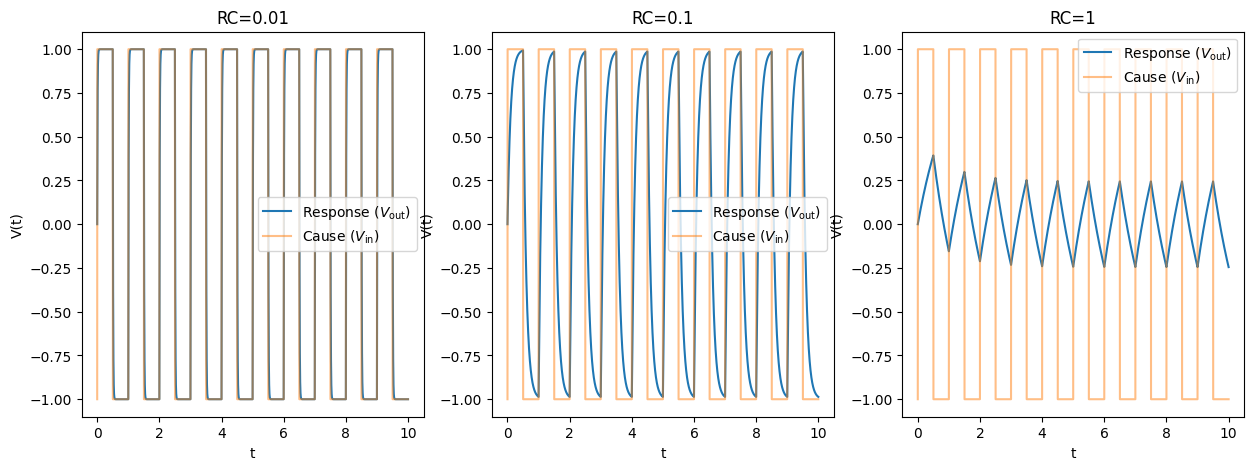

In [9]:
# Problem Values
squarewave: callable = lambda t: 1 if np.sin(2*np.pi*t) > 0 else -1
f1: callable = lambda t, v_out: (squarewave(t) - v_out)/0.01
f2: callable = lambda t, v_out: (squarewave(t) - v_out)/0.1
f3: callable = lambda t, v_out: (squarewave(t) - v_out)/1
t0: float = 0
v0: float = 0
dt: float = 0.001
tf: float = 10

# Solve
t1, v1 = runge_kutta_method_function(f1, t0, v0, dt, tf)
t2, v2 = runge_kutta_method_function(f2, t0, v0, dt, tf)
t3, v3 = runge_kutta_method_function(f3, t0, v0, dt, tf)

# Plot 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 (RC = 0.01)
axs[0].plot(t1, v1, label=r'Response ($V_\text{out}$)')
axs[0].plot(t1, [squarewave(i) for i in t1], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[0].set_xlabel('t')
axs[0].set_ylabel('V(t)')
axs[0].set_title('RC=0.01')
axs[0].legend()

# Plot 2 (RC = 0.1)
axs[1].plot(t2, v2, label=r'Response ($V_\text{out}$)')
axs[1].plot(t2, [squarewave(i) for i in t2], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[1].set_xlabel('t')
axs[1].set_ylabel('V(t)')
axs[1].set_title('RC=0.1')
axs[1].legend()

# Plot 3 (RC = 1)
axs[2].plot(t3, v3, label=r'Response ($V_\text{out}$)')
axs[2].plot(t3, [squarewave(i) for i in t3], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[2].set_xlabel('t')
axs[2].set_ylabel('V(t)')
axs[2].set_title('RC=1')
axs[2].legend()

# Show Plots
plt.show()

#### Problem 2.B
Compare the large-time behavior of $V_\text{out}(t)$ with the expected periodic solution calculated using the Fourier series for $V_\text{in}(t)$. 

The Fourier series expansion of the square wave (approximated by truncating the series up to a chosen value of N) is given by:
$$V_\text{in}(t)\simeq\sum_{n=1}^N w_n\sin\left(2\pi nt\right), w_n=\begin{cases}\tfrac{4}{\pi n}&n\in\text{Odd}\\0&n\in\text{Even}\end{cases}$$

Using this expansion, the periodic part of $V_\text{in}(t)$ can be approximated as:
$$\bar{V}_\infty\simeq\sum_{n=1,3,5,\dots}^N\dfrac{\alpha\omega_n}{\alpha^2+\omega_0^2n^2}\left(-\omega_0n\cos(\omega_0nt)+\alpha\sin(\omega_0nt)\right)$$
where $\alpha=\tfrac{1}{RC}$ and $\omega_0=2\pi$.

Write a program to compute $\bar{V}_\infty$ using this formula for a chosen number of terms $N$ in the series. Use the same values of $RC$ as in part (a). Compare these results with the numerical solution you obtained earlier.

**Note:** This is not the general solution, but only the periodic component capturing the long-time behavior. The most general solution is the sum of the periodic part captured by the Fourier series and a generic solution of the homogeneous equation. Therefore, it is of the form:
$$V_\text{out}(t)=\bar{V}_\infty(t)+Ae^{-\alpha t}$$
where $A$ depends on the initial condition.

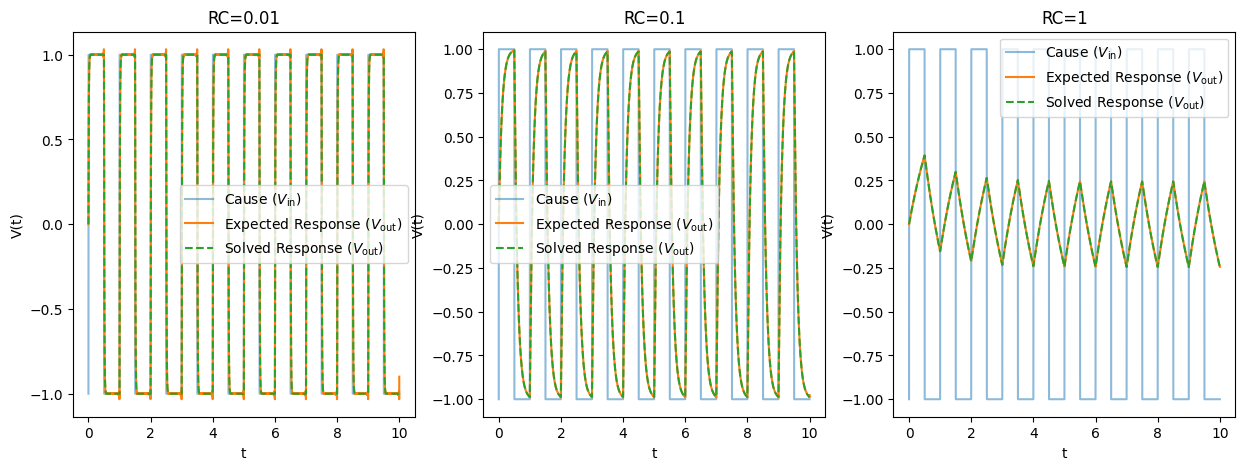

In [10]:
import numpy as np

# Problem Values
N: int = 100
t0: float = 0
v0: float = 0
dt: float = 0.001
tf: float = 10

# Periodic Solution
def periodic_solution(t: float | int, a: float | int, N: int) -> float:
    return (4/np.pi) * sum((a/n)/(a**2+(2*np.pi)**2*n**2) * (-2*np.pi*n*np.cos(2*np.pi*n*t) + a*np.sin(2*np.pi*n*t)) for n in range(1, N, 2))

# Plot
A1 = v0 - periodic_solution(0, 1/0.01, N)
A2 = v0 - periodic_solution(0, 1/0.1, N)
A3 = v0 - periodic_solution(0, 1/1, N)

# Solve
t1, v1 = runge_kutta_method_function(f1, t0, v0, dt, tf)
t2, v2 = runge_kutta_method_function(f2, t0, v0, dt, tf)
t3, v3 = runge_kutta_method_function(f3, t0, v0, dt, tf)

# Plot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1 (RC = 0.01)
axs[0].plot(t1, [squarewave(i) for i in t1], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[0].plot(t1, [periodic_solution(i, 1/0.01, N) + A1*np.exp(-i/0.01) for i in t1], label=r'Expected Response ($V_\text{out}$)')
axs[0].plot(t1, v1, label=r'Solved Response ($V_\text{out}$)', linestyle='--')
axs[0].set_xlabel('t')
axs[0].set_ylabel('V(t)')
axs[0].set_title('RC=0.01')
axs[0].legend()

# Plot 2 (RC = 0.1)
axs[1].plot(t2, [squarewave(i) for i in t2], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[1].plot(t2, [periodic_solution(i, 1/0.1, N) + A2*np.exp(-i/0.1) for i in t2], label=r'Expected Response ($V_\text{out}$)')
axs[1].plot(t2, v2, label=r'Solved Response ($V_\text{out}$)', linestyle='--')
axs[1].set_xlabel('t')
axs[1].set_ylabel('V(t)')
axs[1].set_title('RC=0.1')
axs[1].legend()

# Plot 3 (RC = 1)
axs[2].plot(t3, [squarewave(i) for i in t3], label=r'Cause ($V_\text{in}$)', alpha=0.5)
axs[2].plot(t3, [periodic_solution(i, 1/1, N) + A3*np.exp(-i/1) for i in t3], label=r'Expected Response ($V_\text{out}$)')
axs[2].plot(t3, v3, label=r'Solved Response ($V_\text{out}$)', linestyle='--')
axs[2].set_xlabel('t')
axs[2].set_ylabel('V(t)')
axs[2].set_title('RC=1')
axs[2].legend()

# Show Plots
plt.show()

The expected response match the series solution pretty much perfectly for $N=100$, which was to be expected as per the question's assertion.

#### Problem 2.C
Based on the graphs produced by your program, describe what you see and explain what the circuit is doing for different values of RC.

For higher values of RC, it takes longer for the system to get to an equilibrium with the signal input, which can be seen because smaller values of RC reach the input signal much faster than higher RC values.